<a href="https://colab.research.google.com/github/v4760/face_detection_neural_nets_YOLO/blob/main/Demo_MileStone3_YOLOv8_Model_Train_and_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOv8 Models for Face Detection of Celebrities (Fall 2025)**

**Initial Model**

In [2]:
!pip install -r "/content/drive/MyDrive/requirements.txt" -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823

In [1]:
# Mount Google Drive (To save variables and access image files)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import os
import zipfile
from ultralytics import YOLO
import yaml
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import shutil
from ultralytics import YOLO
import pandas as pd
import os
from IPython.display import Image, display
import os, random
from pathlib import Path
import pandas as pd
from ultralytics import YOLO
from IPython.display import Image, display
import torch, os, zipfile, yaml, pandas as pd

import gradio as gr
from pathlib import Path
from typing import Optional, List, Dict
import pandas as pd
from PIL import Image
from ultralytics import YOLO
import os

### YOLOV8 CELEBRITY DETECTION WITH GPU - GOOGLE COLAB


In [4]:
# Check GPU (runtime needs to be changed to GPU on colab)
import torch
print(f"GPU Available: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")


# Unzip dataset (dataset of images + augmented images)

ZIP_PATH = '/content/drive/MyDrive/yolo_celeba_dataset_enhanced.zip'
EXTRACT_TO = '/content/dataset'

print("Extracting dataset...")
os.makedirs(EXTRACT_TO, exist_ok=True)

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_TO)

print("Dataset extracted")

# Find and update data.yaml
print("\nFinding data.yaml...")
yaml_path = None

for root, dirs, files in os.walk(EXTRACT_TO):
    if 'data.yaml' in files:
        yaml_path = os.path.join(root, 'data.yaml')
        print(f"Found: {yaml_path}")
        break

if not yaml_path:
    raise FileNotFoundError("data.yaml not found!")

# Update yaml with correct paths

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update to absolute path
data['path'] = os.path.dirname(yaml_path)

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print(f"Updated data.yaml path: {data['path']}")

# Verify dataset structure
print(f"\nDataset structure:")
print(f"  Train images: {len(os.listdir(os.path.join(data['path'], 'images/train')))}")
print(f"  Val images: {len(os.listdir(os.path.join(data['path'], 'images/val')))}")

# Train
model = YOLO('yolov8n.pt')

print("\n" + "="*70)
print("TRAINING WITH GPU - Memory Optimized")
print("="*70)

results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=416,
    batch=16,
    device=0,
    project='celeb_runs',
    name='celeb_detector',
    patience=15,
    save=True,
    plots=True,
    verbose=True,
    amp=True,
    cache=False,
    workers=2
)

print("\nTraining complete!")
print("="*70)



GPU Available: True
GPU Name: Tesla T4
Extracting dataset...
Dataset extracted

Finding data.yaml...
Found: /content/dataset/yolo_celeba_dataset/data.yaml
Updated data.yaml path: /content/dataset/yolo_celeba_dataset

Dataset structure:
  Train images: 1000
  Val images: 200

TRAINING WITH GPU - Memory Optimized
New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/yolo_celeba_dataset/data.yaml, epochs=50, time=None, patience=15, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=2, project=celeb_runs, name=celeb_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scal

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vikaskagawad (vikaskagawad-northeastern-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


/usr/local/lib/python3.12/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/dataset/yolo_celeba_dataset/labels/train... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 2128.52it/s]

train: New cache created: /content/dataset/yolo_celeba_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/dataset/yolo_celeba_dataset/labels/val... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 1144.94it/s]


val: New cache created: /content/dataset/yolo_celeba_dataset/labels/val.cache
Plotting labels to celeb_runs/celeb_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00027, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to celeb_runs/celeb_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.06G       1.44      4.751      1.381         36        416: 100%|██████████| 63/63 [00:13<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        200        726     0.0306     0.0523      0.018     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.02G      1.227      4.285      1.297         31        416: 100%|██████████| 63/63 [00:11<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.84it/s]

                   all        200        726     0.0285      0.985     0.0417       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.05G      1.211      4.065      1.283         62        416: 100%|██████████| 63/63 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]

                   all        200        726     0.0265          1     0.0463     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.04G      1.211      3.969      1.255         44        416: 100%|██████████| 63/63 [00:10<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]


                   all        200        726     0.0321      0.867     0.0598     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.04G      1.171      3.884      1.233         37        416: 100%|██████████| 63/63 [00:09<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]


                   all        200        726     0.0498      0.524     0.0796     0.0777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.02G      1.062      3.726      1.187         36        416: 100%|██████████| 63/63 [00:10<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]

                   all        200        726      0.132      0.294      0.118      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.04G      1.052      3.642      1.179         55        416: 100%|██████████| 63/63 [00:10<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.96it/s]

                   all        200        726      0.149      0.268      0.153      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.04G      1.045      3.595      1.171         47        416: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]

                   all        200        726      0.192      0.339      0.181      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.06G      1.009      3.517      1.149         32        416: 100%|██████████| 63/63 [00:11<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.75it/s]

                   all        200        726      0.242      0.369      0.218      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.05G     0.9852      3.452      1.138         41        416: 100%|██████████| 63/63 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]

                   all        200        726      0.267      0.325      0.243      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.04G     0.9782      3.414      1.134         50        416: 100%|██████████| 63/63 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.03it/s]

                   all        200        726      0.204      0.425      0.256      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.06G     0.9578      3.377      1.118         35        416: 100%|██████████| 63/63 [00:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]

                   all        200        726      0.223      0.415      0.293      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.05G      0.956      3.321      1.123         41        416: 100%|██████████| 63/63 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.05it/s]

                   all        200        726      0.313      0.373      0.315      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.04G     0.9714      3.356      1.123         32        416: 100%|██████████| 63/63 [00:10<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]


                   all        200        726      0.249       0.43      0.308      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.06G     0.9388      3.279      1.108         48        416: 100%|██████████| 63/63 [00:09<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]


                   all        200        726      0.275      0.456      0.346      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.04G     0.9309       3.23      1.108         45        416: 100%|██████████| 63/63 [00:09<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]


                   all        200        726      0.317      0.471       0.39      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.05G     0.9634      3.275      1.116         36        416: 100%|██████████| 63/63 [00:10<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200        726      0.334      0.475      0.404      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.05G     0.8963      3.205      1.085         61        416: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]


                   all        200        726      0.384      0.487      0.429      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.06G     0.9051      3.188      1.097         24        416: 100%|██████████| 63/63 [00:11<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.05it/s]

                   all        200        726      0.352      0.489      0.399      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.07G     0.8951      3.166      1.086         33        416: 100%|██████████| 63/63 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]

                   all        200        726      0.322      0.434      0.383      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.04G     0.8568      3.063      1.079         35        416: 100%|██████████| 63/63 [00:11<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]

                   all        200        726      0.388       0.51       0.47      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.03G     0.9128      3.151      1.097         51        416: 100%|██████████| 63/63 [00:11<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]

                   all        200        726      0.404      0.505      0.473      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.04G     0.8617      3.041      1.075         45        416: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]

                   all        200        726      0.445      0.482      0.477      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.04G     0.8609      3.015       1.07         51        416: 100%|██████████| 63/63 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.85it/s]

                   all        200        726      0.484      0.508      0.525      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.04G     0.8434          3      1.063         60        416: 100%|██████████| 63/63 [00:10<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all        200        726      0.453      0.552      0.533      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.03G     0.8516      3.019      1.067         49        416: 100%|██████████| 63/63 [00:10<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


                   all        200        726      0.486      0.545      0.543      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.05G     0.8457      2.981      1.065         30        416: 100%|██████████| 63/63 [00:09<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.91it/s]


                   all        200        726      0.446      0.546      0.525      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.06G     0.8574      2.984      1.067         40        416: 100%|██████████| 63/63 [00:10<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        200        726      0.512      0.518      0.559      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.06G     0.8589      3.009      1.064         30        416: 100%|██████████| 63/63 [00:10<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]

                   all        200        726      0.469      0.535      0.542      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.03G     0.8717          3      1.077         55        416: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]


                   all        200        726      0.519      0.556      0.577      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.06G     0.8613      2.942       1.07         27        416: 100%|██████████| 63/63 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.93it/s]

                   all        200        726      0.487      0.577      0.582       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.04G     0.8393      2.891      1.054         57        416: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        200        726      0.581      0.565      0.617      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.05G     0.8273       2.87      1.056         38        416: 100%|██████████| 63/63 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]

                   all        200        726      0.568      0.559      0.612       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.04G     0.8381      2.887      1.065         37        416: 100%|██████████| 63/63 [00:11<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.90it/s]

                   all        200        726      0.565      0.563      0.611       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.05G     0.8412      2.878      1.059         32        416: 100%|██████████| 63/63 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.88it/s]

                   all        200        726      0.593      0.581      0.617      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.04G     0.8189      2.857      1.053         34        416: 100%|██████████| 63/63 [00:10<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        200        726       0.58      0.597      0.632       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.04G     0.8296      2.837      1.052         45        416: 100%|██████████| 63/63 [00:10<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


                   all        200        726      0.586      0.603       0.64      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.03G     0.8092      2.804      1.046         37        416: 100%|██████████| 63/63 [00:09<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]


                   all        200        726       0.57      0.601      0.637      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.04G     0.8273        2.8      1.066         50        416: 100%|██████████| 63/63 [00:10<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.02it/s]

                   all        200        726      0.586       0.61      0.649      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.06G     0.8117        2.8      1.045         40        416: 100%|██████████| 63/63 [00:10<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        200        726      0.559      0.632      0.649      0.647


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.04G     0.7112      2.677     0.9958         30        416: 100%|██████████| 63/63 [00:11<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        200        726      0.605      0.586      0.648      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.03G     0.7043      2.676      0.996         31        416: 100%|██████████| 63/63 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.53it/s]

                   all        200        726      0.628      0.615      0.666      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.05G     0.6959      2.659     0.9791         29        416: 100%|██████████| 63/63 [00:10<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        200        726       0.64      0.628      0.671       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.04G     0.6991      2.611     0.9849         23        416: 100%|██████████| 63/63 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        200        726      0.615      0.607      0.664      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.05G     0.7031      2.628     0.9895         25        416: 100%|██████████| 63/63 [00:10<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        200        726      0.636      0.611      0.673      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.04G     0.7059      2.636     0.9871         30        416: 100%|██████████| 63/63 [00:10<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.55it/s]


                   all        200        726      0.614      0.601      0.672       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.04G     0.6883      2.599     0.9849         26        416: 100%|██████████| 63/63 [00:09<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]


                   all        200        726      0.613      0.628      0.681      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.04G     0.6866      2.593     0.9741         29        416: 100%|██████████| 63/63 [00:09<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.66it/s]

                   all        200        726      0.627      0.641      0.686      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.04G     0.6777      2.586     0.9749         26        416: 100%|██████████| 63/63 [00:10<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        200        726      0.616      0.636      0.687      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.03G     0.6751      2.568     0.9745         28        416: 100%|██████████| 63/63 [00:10<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        200        726      0.621      0.648      0.688      0.686



50 epochs completed in 0.187 hours.
Optimizer stripped from celeb_runs/celeb_detector/weights/last.pt, 6.2MB
Optimizer stripped from celeb_runs/celeb_detector/weights/best.pt, 6.2MB

Validating celeb_runs/celeb_detector/weights/best.pt...
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,012,083 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


                   all        200        726      0.626      0.646      0.688      0.686
                     0         21         21      0.537      0.952      0.883      0.883
                     1         33         33      0.947      0.788      0.874       0.87
                     2         20         20      0.849        0.9      0.948      0.942
                     3         14         14      0.371      0.547      0.516      0.516
                     4         25         25      0.486       0.64      0.605      0.589
                     5         27         27      0.618      0.889      0.879      0.867
                     6         20         20      0.388       0.25      0.412      0.412
                     7         17         17      0.434      0.406      0.388      0.378
                     8         24         24      0.529      0.333      0.435      0.435
                     9         24         24      0.691      0.917      0.925      0.925
                    1

lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▁▁▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇█████████
metrics/mAP50-95(B),▁▁▁▁▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇█████████
metrics/precision(B),▁▁▁▁▁▂▃▃▄▃▄▄▄▄▅▅▄▅▅▆▆▆▇▆▇▇▇▇▇▇▇▇████████
metrics/recall(B),▁██▇▄▃▃▃▃▄▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...



Training complete!
Loaded 33 celebrity mappings


FileNotFoundError: [Errno 2] No such file or directory: '/celeb_runs/celeb_detector/weights/best.pt'

Loaded 33 celebrity mappings

Testing on sample images:

image 1/1 /content/dataset/yolo_celeba_dataset/images/val/val_00073.jpg: 416x416 1 12, 1 13, 1 21, 1 32, 10.4ms
Speed: 2.5ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

val_00073.jpg:
  Detected 4 celebrities:
    - Celebrity ID 3321: 61.30%
    - Celebrity ID 7904: 57.50%
    - Celebrity ID 3401: 45.80%
    - Celebrity ID 10173: 32.48%

image 1/1 /content/dataset/yolo_celeba_dataset/images/val/val_00068.jpg: 416x416 1 1, 1 3, 1 13, 1 29, 6.6ms
Speed: 1.6ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

val_00068.jpg:
  Detected 4 celebrities:
    - Celebrity ID 3401: 91.44%
    - Celebrity ID 1499: 82.57%
    - Celebrity ID 800: 67.52%
    - Celebrity ID 9256: 43.11%

image 1/1 /content/dataset/yolo_celeba_dataset/images/val/val_00169.jpg: 416x416 1 9, 1 29, 6.4ms
Speed: 1.4ms preprocess, 6.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416

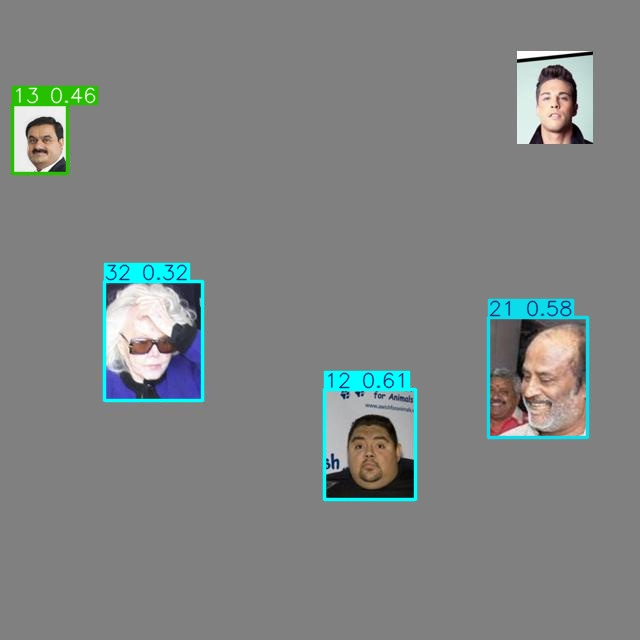

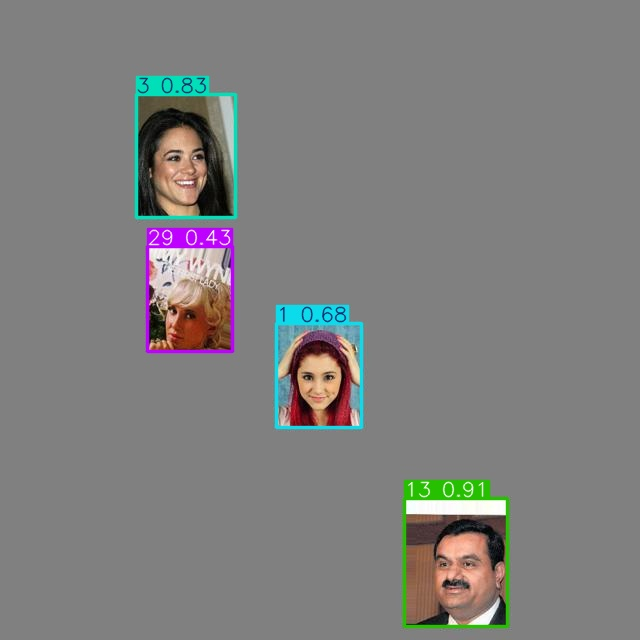

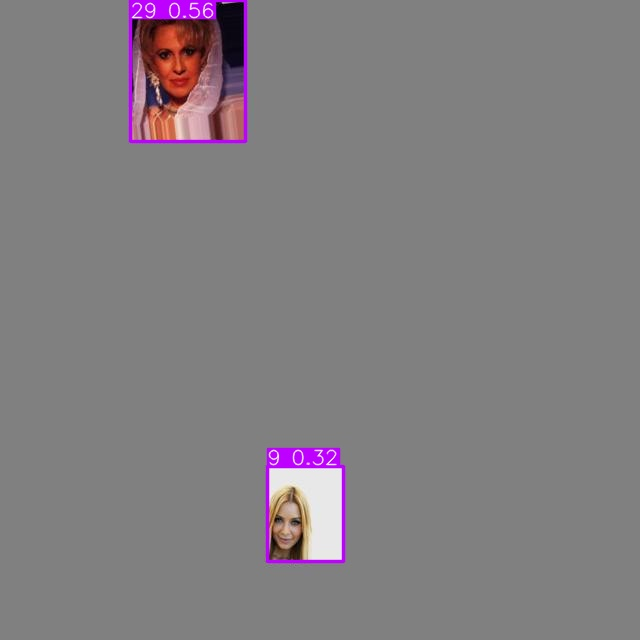


Model saved to Google Drive: celeb_detector_best.pt

FINAL RESULTS
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/dataset/yolo_celeba_dataset/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]


                   all        200        726      0.621      0.648      0.687      0.686
                     0         21         21      0.524      0.952      0.883      0.883
                     1         33         33      0.946      0.788      0.875      0.871
                     2         20         20      0.841        0.9      0.948      0.942
                     3         14         14      0.373      0.553      0.516      0.516
                     4         25         25      0.496      0.668      0.604      0.588
                     5         27         27      0.617      0.889      0.876      0.865
                     6         20         20      0.381       0.25      0.412      0.412
                     7         17         17      0.436      0.409      0.389      0.389
                     8         24         24      0.527      0.333      0.435      0.435
                     9         24         24      0.686      0.917      0.925      0.925
                    1

In [7]:
# Load class mapping

mapping_path = os.path.join(data['path'], 'class_mapping.csv')
class_mapping = pd.read_csv(mapping_path)
reverse_map = dict(zip(class_mapping['class_id'], class_mapping['celebrity_id']))

print(f"Loaded {len(class_mapping)} celebrity mappings")

# Test and visualize
trained_model = YOLO('celeb_runs/celeb_detector/weights/best.pt')

val_img_dir = os.path.join(data['path'], 'images/val')
test_imgs = [os.path.join(val_img_dir, f) for f in os.listdir(val_img_dir)[:3]]

print("\nTesting on sample images:")
for img_path in test_imgs:
    results = trained_model(img_path)

    for result in results:
        boxes = result.boxes
        print(f"\n{os.path.basename(img_path)}:")
        print(f"  Detected {len(boxes)} celebrities:")

        for box in boxes:
            class_id = int(box.cls[0].item())
            conf = box.conf[0].item()
            celeb_id = reverse_map[class_id]
            print(f"    - Celebrity ID {celeb_id}: {conf:.2%}")

        # Save visualization
        save_path = f'/content/result_{os.path.basename(img_path)}'
        result.save(save_path)

# Display results
print("\nVisualizing detections:")
for img_path in test_imgs:
    result_path = f'/content/result_{os.path.basename(img_path)}'
    if os.path.exists(result_path):
        display(Image(result_path))

# Save model to Google Drive

best_model = 'celeb_runs/celeb_detector/weights/best.pt'
drive_path = '/content/drive/MyDrive/celeb_detector_best.pt'

shutil.copy(best_model, drive_path)
print(f"\nModel saved to Google Drive: celeb_detector_best.pt")

# Print final metrics
print("\n" + "="*70)
print("FINAL RESULTS")
print("="*70)
metrics = trained_model.val()
print(f"mAP50: {metrics.box.map50:.3f} ({metrics.box.map50*100:.1f}%)")
print(f"mAP50-95: {metrics.box.map:.3f} ({metrics.box.map*100:.1f}%)")

TESTING TRAINED MODEL

[1] Running validation...
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,012,083 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/yolo_celeba_dataset/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.44it/s]


                   all        200        726      0.621      0.648      0.687      0.686
                     0         21         21      0.524      0.952      0.883      0.883
                     1         33         33      0.946      0.788      0.875      0.871
                     2         20         20      0.841        0.9      0.948      0.942
                     3         14         14      0.373      0.553      0.516      0.516
                     4         25         25      0.496      0.668      0.604      0.588
                     5         27         27      0.617      0.889      0.876      0.865
                     6         20         20      0.381       0.25      0.412      0.412
                     7         17         17      0.436      0.409      0.389      0.389
                     8         24         24      0.527      0.333      0.435      0.435
                     9         24         24      0.686      0.917      0.925      0.925
                    1

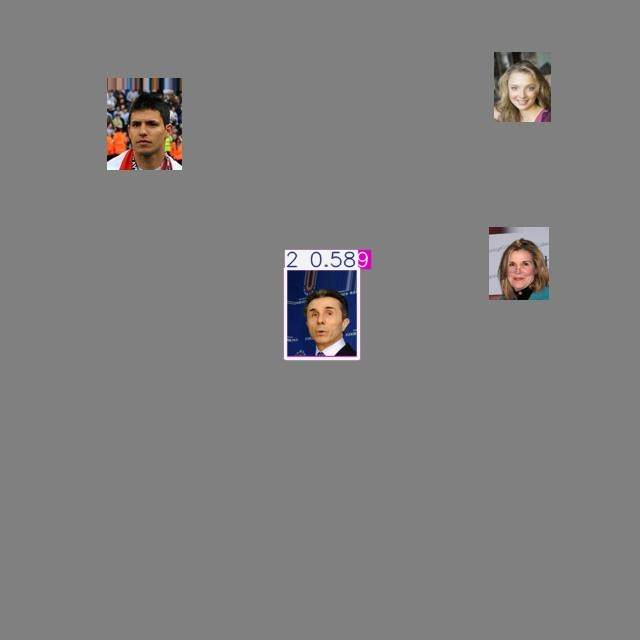


val_00002.jpg:


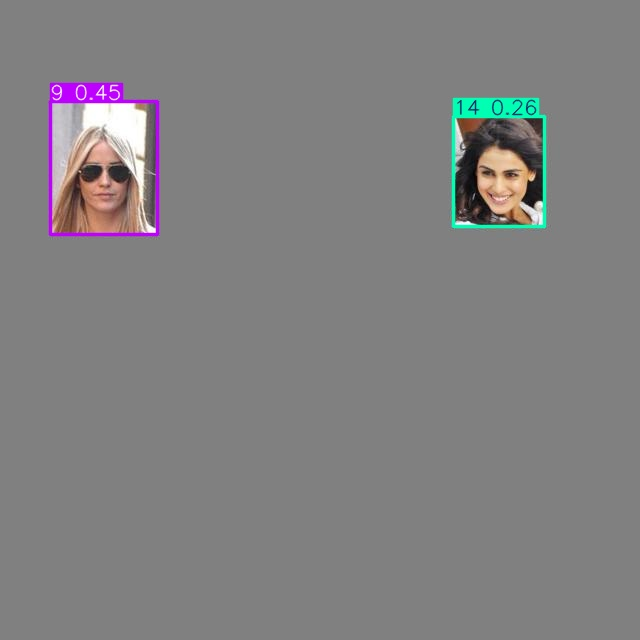


val_00003.jpg:


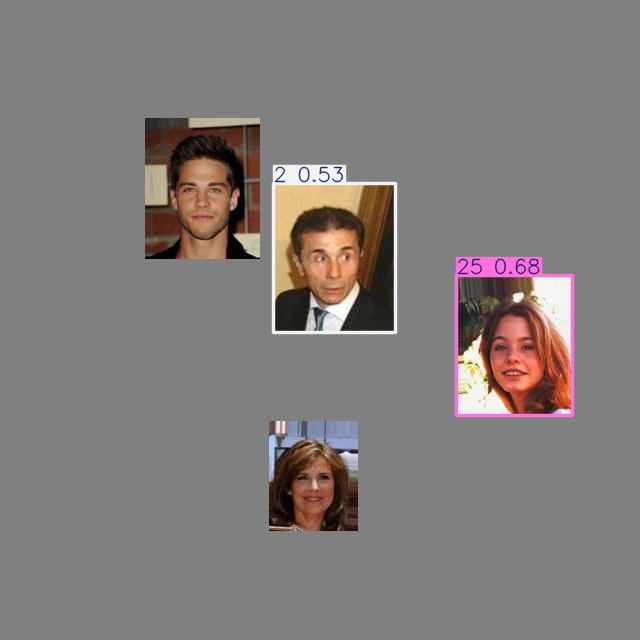


val_00004.jpg:


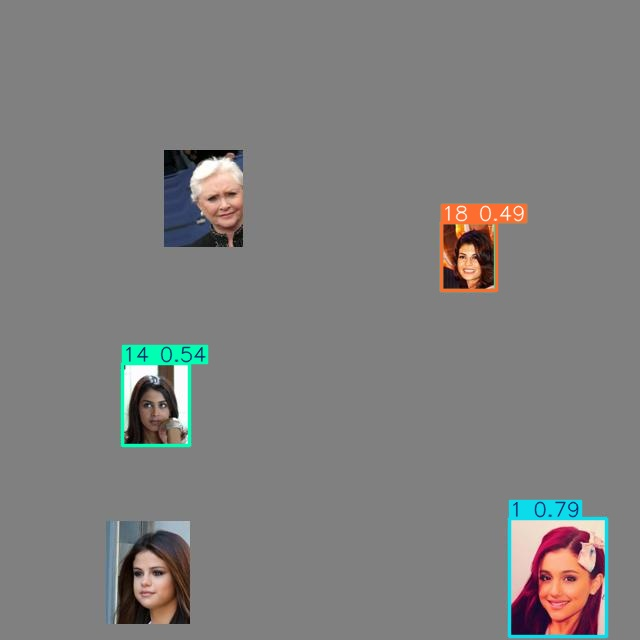


val_00005.jpg:


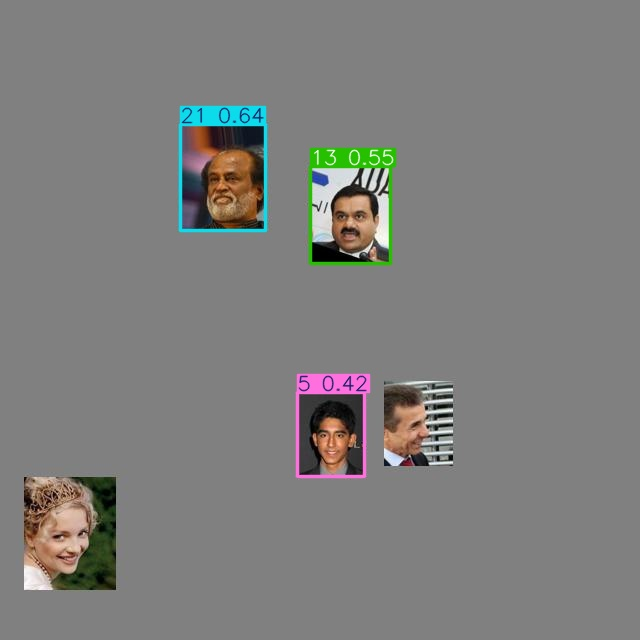


val_00006.jpg:


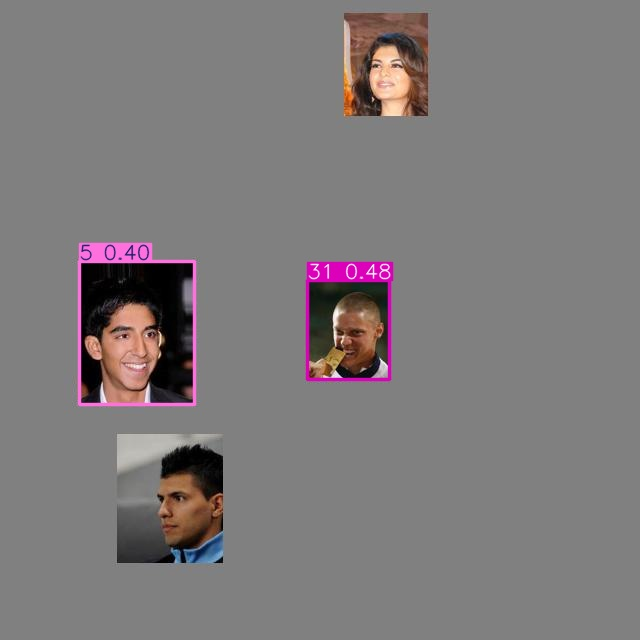


val_00007.jpg:


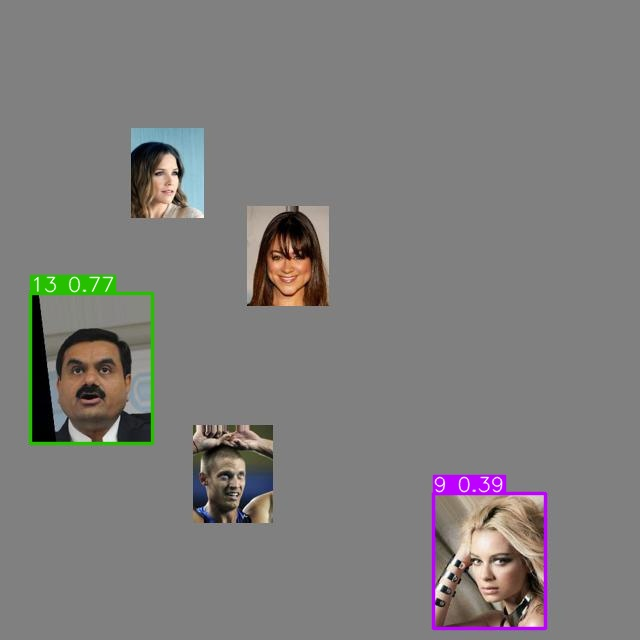


val_00008.jpg:


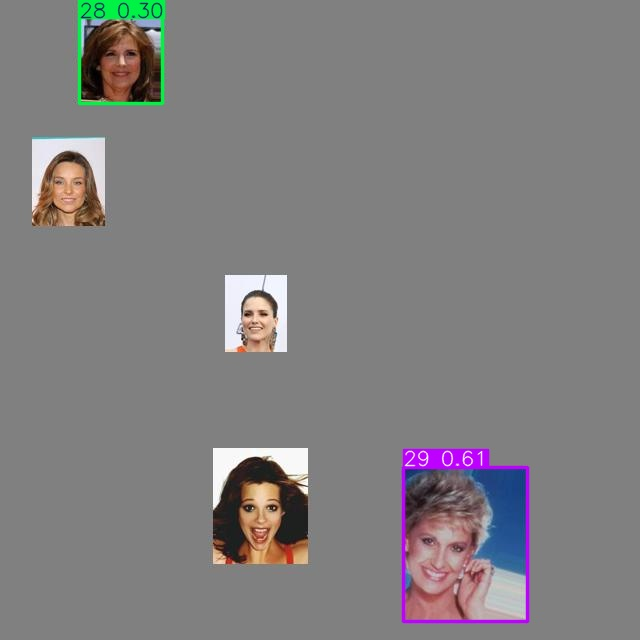


val_00009.jpg:


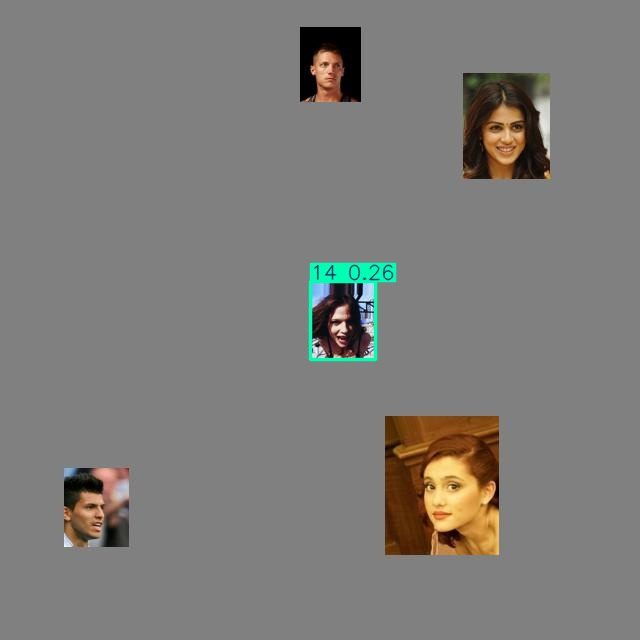


TESTING COMPLETE!


In [ ]:
# TEST MODEL
# Load trained model
trained_model = YOLO('celeb_runs/celeb_detector/weights/best.pt')

# Load class mapping (celeb ID given 47 sequential numbers)
mapping_path = os.path.join(data['path'], 'class_mapping.csv')
class_mapping = pd.read_csv(mapping_path)
reverse_map = dict(zip(class_mapping['class_id'], class_mapping['celebrity_id']))

print("="*70)
print("TESTING TRAINED MODEL")
print("="*70)

# Validate on entire validation set

print("\n[1] Running validation...")
metrics = trained_model.val()
print(f"\nValidation Results:")
print(f"  mAP50: {metrics.box.map50:.3f} ({metrics.box.map50*100:.1f}%)")
print(f"  mAP50-95: {metrics.box.map:.3f} ({metrics.box.map*100:.1f}%)")

# TEST 2: Test on sample images
print("\n[2] Testing on sample images...")

val_img_dir = os.path.join(data['path'], 'images/val')
test_imgs = sorted([os.path.join(val_img_dir, f) for f in os.listdir(val_img_dir) if f.endswith('.jpg')])[1:10]

for img_path in test_imgs:
    print(f"\n--- {os.path.basename(img_path)} ---")

    results = trained_model(img_path, conf=0.25)

    for result in results:
        boxes = result.boxes
        print(f"Detected {len(boxes)} celebrities:")

        for box in boxes:
            class_id = int(box.cls[0].item())
            conf = box.conf[0].item()
            celeb_id = reverse_map[class_id]
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            print(f"  - Celebrity ID {celeb_id}: {conf:.2%} at [{int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}]")

        save_path = f'/content/result_{os.path.basename(img_path)}'
        result.save(save_path)

# TEST 3: Visualize with boxing around objects detected
print("\n[3] Visualizing detections...")

for img_path in test_imgs:
    result_path = f'/content/result_{os.path.basename(img_path)}'
    if os.path.exists(result_path):
        print(f"\n{os.path.basename(img_path)}:")
        display(Image(result_path))

print("\n" + "="*70)
print("TESTING COMPLETE!")
print("="*70)

Single Image test

In [11]:
# @title
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load model and test
from ultralytics import YOLO

# model path from Google Drive
model = YOLO('celeb_runs/celeb_detector/weights/best.pt')
#/content/runs/detect/val2/

# Test on single image
results = model.predict(
    source='/content/drive/MyDrive/yolo_celeba_dataset/images/train/train_00021.jpg',
    conf=0.34,
    save=True
)


# Results save to: runs/detect/predict/


image 1/1 /content/drive/MyDrive/yolo_celeba_dataset/images/train/train_00021.jpg: 416x416 1 32, 7.2ms
Speed: 3.5ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict


In [13]:
# Save model to Google Drive to ensure it can be called in new runtime
import shutil

best_model = 'celeb_runs/celeb_detector/weights/best.pt'
drive_path = '/content/drive/MyDrive/celeb_detector_best.pt'

shutil.copy(best_model, drive_path)
print(f"\nModel saved to Google Drive: celeb_detector_best.pt")


Model saved to Google Drive: celeb_detector_best.pt


Testing


0: 416x416 1 13, 1 23, 1 27, 3.8ms
1: 416x416 1 4, 1 13, 1 16, 3.8ms
2: 416x416 1 17, 1 31, 3.8ms
3: 416x416 1 10, 3.8ms
4: 416x416 1 9, 1 14, 1 31, 3.8ms
5: 416x416 1 26, 3.8ms
6: 416x416 1 22, 3.8ms
7: 416x416 1 21, 1 22, 1 28, 3.8ms
8: 416x416 1 12, 3.8ms
9: 416x416 1 1, 1 7, 1 11, 1 12, 3.8ms
Speed: 2.4ms preprocess, 3.8ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to train_eval_out/train10_preds/yolo

train_00668.jpg: 3 detections
  - class 13 (celeb 3401)  conf 0.82  box [382, 295, 445, 376]
  - class 23 (celeb 8722)  conf 0.63  box [257, 83, 332, 175]
  - class 27 (celeb 9152)  conf 0.26  box [399, 148, 513, 290]

train_00118.jpg: 3 detections
  - class 13 (celeb 3401)  conf 0.87  box [273, 29, 395, 178]
  - class 16 (celeb 3745)  conf 0.36  box [500, 522, 559, 595]
  - class 4 (celeb 2425)  conf 0.28  box [114, 260, 232, 404]

train_00023.jpg: 2 detections
  - class 17 (celeb 3782)  conf 0.68  box [495, 463, 612, 608]
  - class 31 (celeb 960

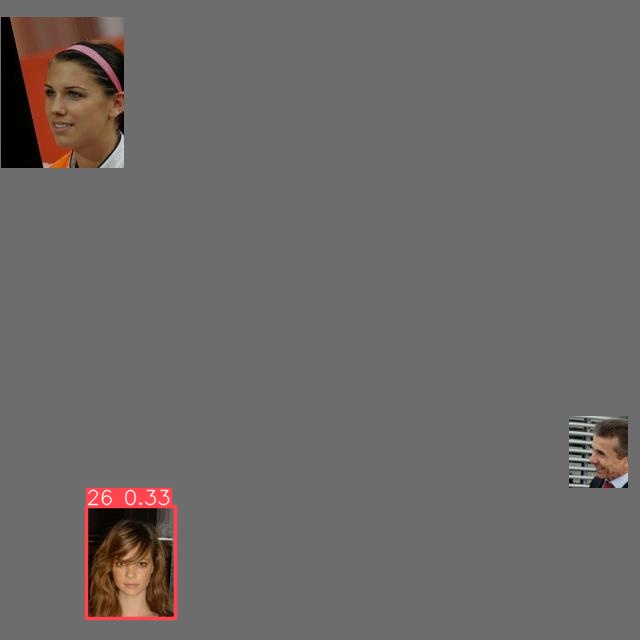

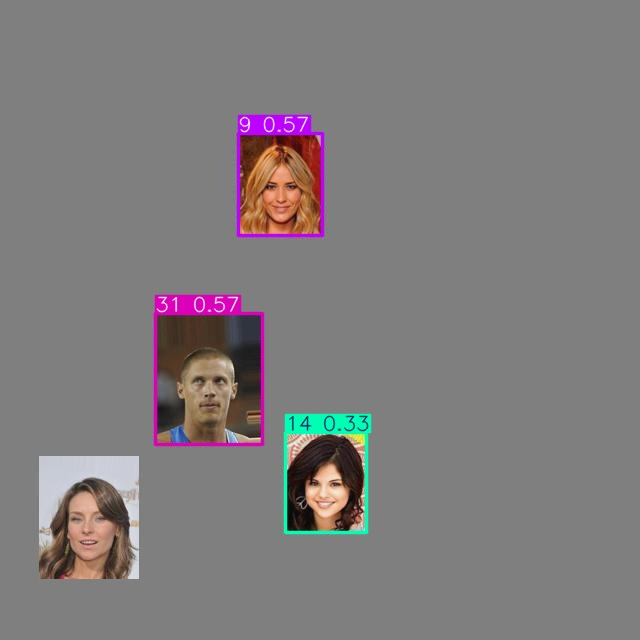

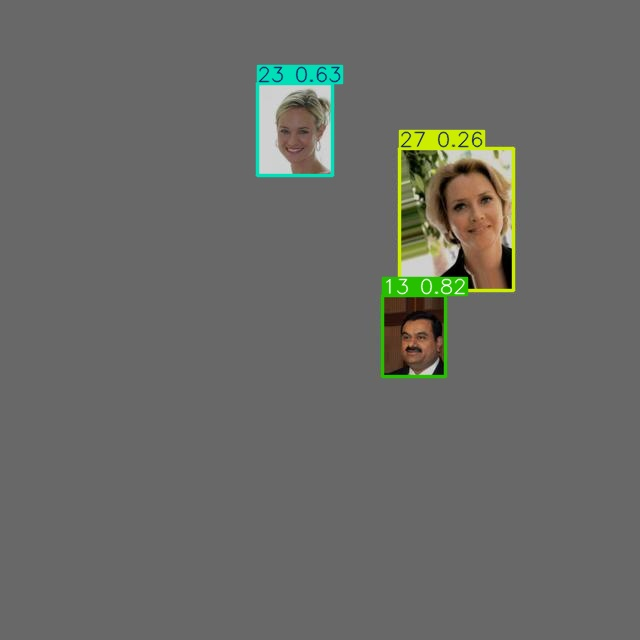

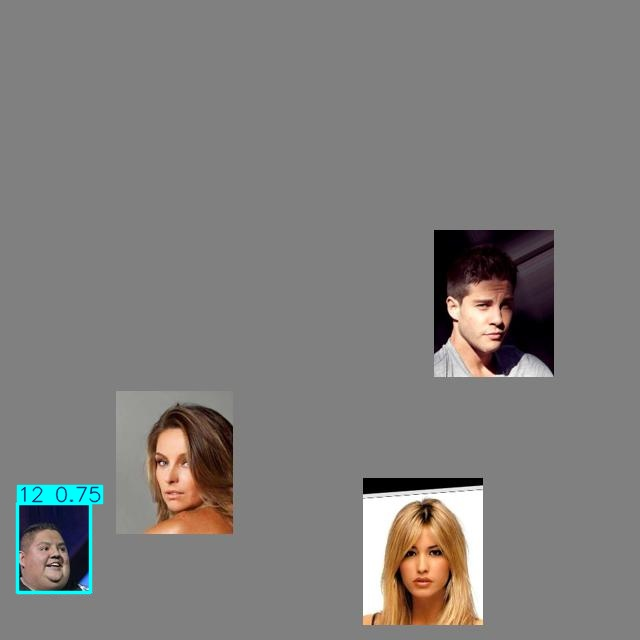

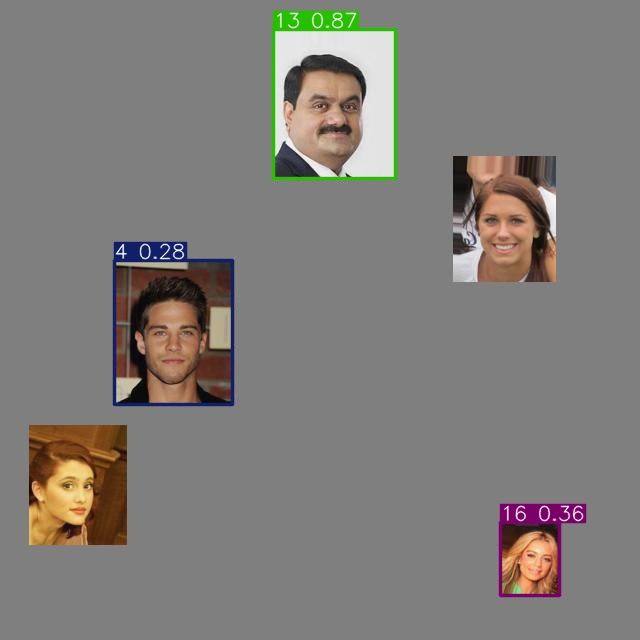

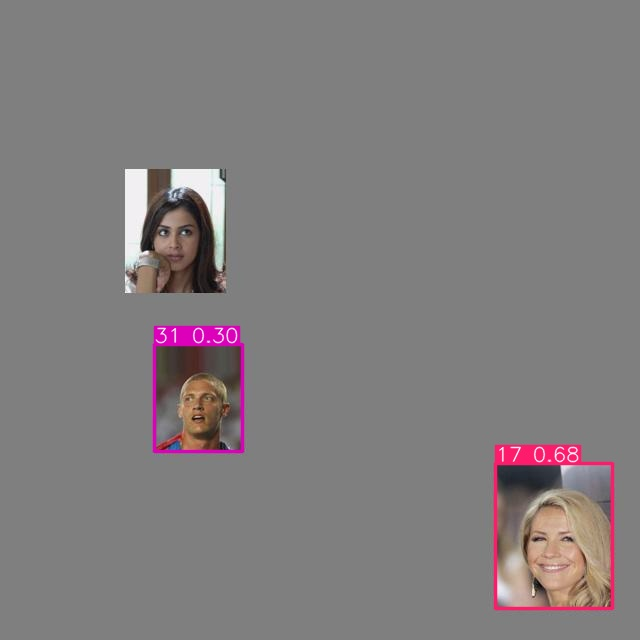

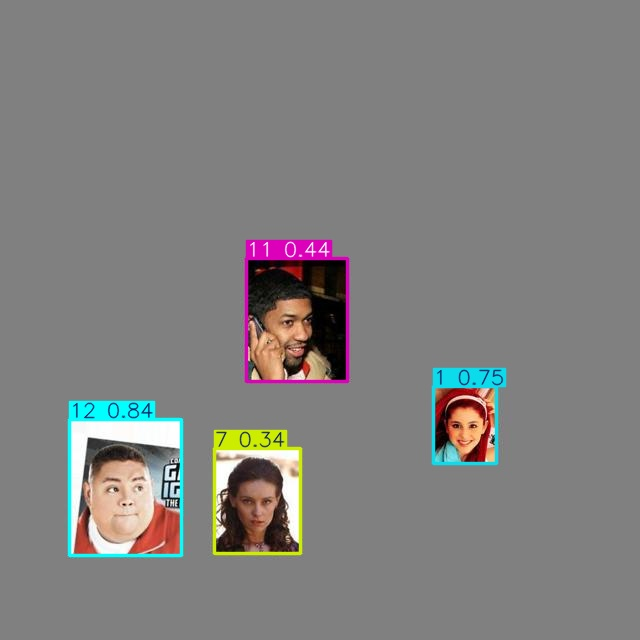

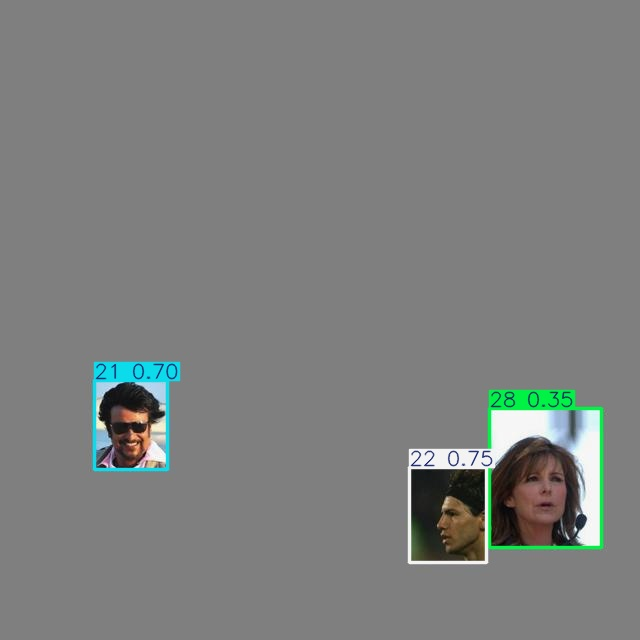

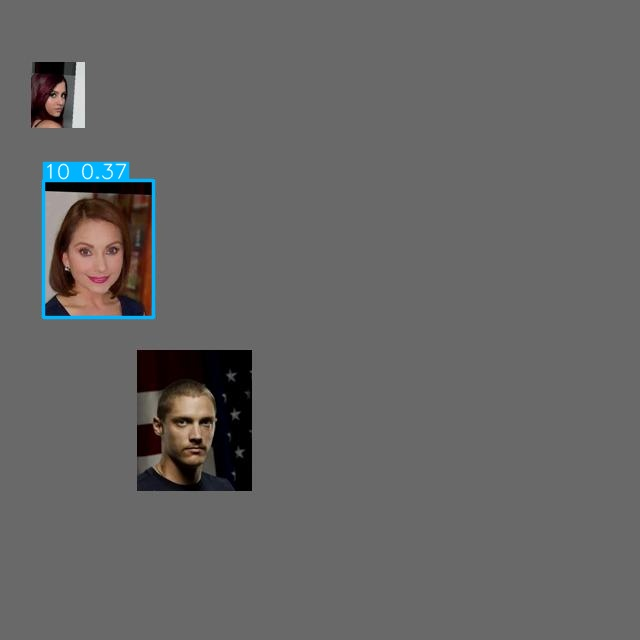

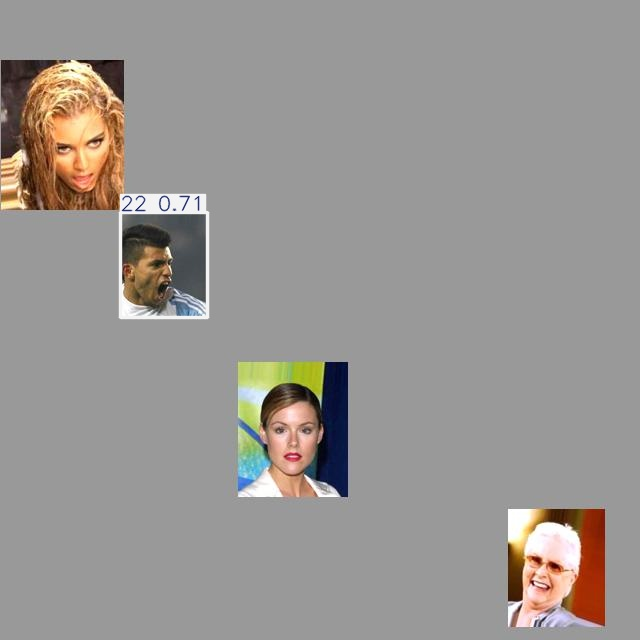

In [15]:
# @title
# Test YOLO on 10 images from yolo_celeba_dataset/images/train
# ---- paths (edit if yours differ)
DATASET_DIR = Path("/content/drive/MyDrive/yolo_celeba_dataset")
TRAIN_DIR   = DATASET_DIR / "images" / "train"
MODEL_PATH  = Path("/content/drive/MyDrive/celeb_detector_best.pt")   # or your Drive path
OUT_DIR     = Path("./train_eval_out")

# ---- pick 10 images
exts = {".jpg", ".jpeg", ".png", ".bmp", ".webp"}
all_imgs = [p for p in TRAIN_DIR.iterdir() if p.suffix.lower() in exts]
assert all_imgs, f"No images found in {TRAIN_DIR}"
random.seed(42)
sampled = random.sample(all_imgs, min(10, len(all_imgs)))

# ---- optional: load class mapping to map class_id -> celeb_id
rev_map = None
map_csv = DATASET_DIR / "class_mapping.csv"
if map_csv.exists():
    dfmap = pd.read_csv(map_csv)
    rev_map = dict(zip(dfmap["class_id"], dfmap["celebrity_id"]))

# ---- load model and run predictions
model = YOLO(str(MODEL_PATH))
OUT_DIR.mkdir(parents=True, exist_ok=True)
preds_dir = OUT_DIR / "train10_preds"

res = model.predict(
    source=[str(p) for p in sampled],
    save=True,
    conf=0.25,
    iou=0.45,
    max_det=300,
    project=str(preds_dir),
    name="yolo",
    exist_ok=True,
    device=0  # set 'cpu' if no GPU
)

# ---- print a compact summary
for r in res:
    img_name = Path(r.path).name
    print(f"\n{img_name}: {len(r.boxes)} detections")
    for b in r.boxes:
        cls_id = int(b.cls[0].item())
        conf   = float(b.conf[0].item())
        celeb  = rev_map.get(cls_id, cls_id) if rev_map is not None else cls_id
        xyxy   = [int(v) for v in b.xyxy[0].tolist()]
        print(f"  - class {cls_id} (celeb {celeb})  conf {conf:.2f}  box {xyxy}")

# ---- show the saved visualizations
vis_folder = preds_dir / "yolo"
if vis_folder.exists():
    to_show = [p for p in vis_folder.iterdir() if p.suffix.lower() in exts]
    for p in to_show:
        display(Image(filename=str(p)))
else:
    print(f"No visualization folder found at {vis_folder}")


**Improved Model to handle small images (initial model showed it had issues with smaller faces)**

GPU Available: True
GPU Name: Tesla T4
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting dataset...
Dataset extracted

Finding data.yaml...
Found: /content/dataset/yolo_celeba_dataset/data.yaml
Updated data.yaml path: /content/dataset/yolo_celeba_dataset

Dataset structure:
  Train images: 1000
  Val images:   200


100%|██████████| 49.7M/49.7M [00:00<00:00, 82.3MB/s]



TRAINING WITH GPU — tuned for small/low-res faces
New https://pypi.org/project/ultralytics/8.3.217 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/dataset/yolo_celeba_dataset/data.yaml, epochs=20, time=None, patience=6, batch=-1, imgsz=768, save=True, save_period=-1, cache=False, device=0, workers=4, project=celeb_runs, name=celeb_detector_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, a

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=768 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.53G reserved, 0.24G allocated, 13.97G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25875427         114         0.870         28.68         36.82        (1, 3, 768, 768)                    list
    25875427         228         1.384         33.69         43.68        (2, 3, 768, 768)                    list
    25875427         456         2.408         60.14          69.2        (4, 3, 768, 768)                    list
    25875427         912         4.536           115         129.4        (8, 3, 768, 768)                    list
    25875427        1824         8.647         243.6         258.2       (16, 3, 768, 768)                    list
Aut

train: Scanning /content/dataset/yolo_celeba_dataset/labels/train... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<00:00, 2347.97it/s]

train: New cache created: /content/dataset/yolo_celeba_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/dataset/yolo_celeba_dataset/labels/val... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 1341.55it/s]

val: New cache created: /content/dataset/yolo_celeba_dataset/labels/val.cache


Plotting labels to celeb_runs/celeb_detector_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00027, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to celeb_runs/celeb_detector_v2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      9.56G      1.239      4.426      1.499         78        768: 100%|██████████| 67/67 [00:49<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        200        726     0.0985      0.476      0.119      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       9.4G      1.059      3.762      1.382         42        768: 100%|██████████| 67/67 [00:47<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        200        726      0.231      0.429      0.256      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.46G      1.004       3.53      1.325         60        768: 100%|██████████| 67/67 [00:47<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        200        726      0.426      0.399      0.357       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.41G     0.9748      3.344      1.308         66        768: 100%|██████████| 67/67 [00:47<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        200        726      0.482      0.509      0.454       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.46G     0.9602       3.26        1.3         58        768: 100%|██████████| 67/67 [00:47<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        726      0.644      0.503      0.575      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.46G     0.9065       3.09      1.272         56        768: 100%|██████████| 67/67 [00:47<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        200        726      0.471      0.569      0.577      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.51G     0.9143      3.028      1.266         67        768: 100%|██████████| 67/67 [00:47<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        200        726      0.556      0.604      0.634      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      9.42G     0.8565      2.919      1.221         52        768: 100%|██████████| 67/67 [00:47<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        726      0.623      0.642      0.697      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.46G      0.826      2.779      1.214         77        768: 100%|██████████| 67/67 [00:47<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        200        726      0.644      0.703      0.737      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      9.49G     0.8236       2.78      1.211         55        768: 100%|██████████| 67/67 [00:47<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        726       0.69      0.697      0.764      0.764


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:1837: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      9.42G     0.6839      2.633      1.119         36        768: 100%|██████████| 67/67 [00:48<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        726      0.712      0.757      0.823      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      9.32G     0.6657      2.451      1.098         38        768: 100%|██████████| 67/67 [00:46<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        200        726      0.814      0.775      0.864      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      9.39G     0.6269      2.345      1.068         40        768: 100%|██████████| 67/67 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        726      0.826      0.772      0.863      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      9.39G     0.6013      2.247      1.044         34        768: 100%|██████████| 67/67 [00:46<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        726      0.861      0.802      0.883      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.41G     0.5866      2.121      1.038         38        768: 100%|██████████| 67/67 [00:46<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        200        726      0.881      0.818      0.906      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      9.31G     0.5771      2.061      1.024         37        768: 100%|██████████| 67/67 [00:46<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        200        726      0.888      0.819      0.899      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      9.39G     0.5618      2.048      1.019         37        768: 100%|██████████| 67/67 [00:46<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        200        726      0.923      0.818       0.91       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.38G     0.5348      1.942     0.9973         35        768: 100%|██████████| 67/67 [00:46<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        726      0.913      0.822      0.905      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      9.41G     0.5404      1.931      1.004         33        768: 100%|██████████| 67/67 [00:46<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        726      0.929      0.824      0.909      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.32G     0.5342      1.923     0.9953         31        768: 100%|██████████| 67/67 [00:46<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        200        726      0.921      0.819      0.904      0.903



20 epochs completed in 0.326 hours.
Optimizer stripped from celeb_runs/celeb_detector_v2/weights/last.pt, 52.1MB
Optimizer stripped from celeb_runs/celeb_detector_v2/weights/best.pt, 52.1MB

Validating celeb_runs/celeb_detector_v2/weights/best.pt...
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,858,867 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


                   all        200        726      0.923      0.817       0.91       0.91
                     0         21         21       0.91          1      0.993      0.993
                     1         33         33          1      0.874      0.947      0.941
                     2         20         20      0.973          1      0.995      0.995
                     3         14         14      0.886      0.786      0.851      0.851
                     4         25         25          1      0.875      0.966      0.966
                     5         27         27          1       0.97      0.995      0.995
                     6         20         20          1      0.731      0.933      0.933
                     7         17         17        0.7       0.55      0.776      0.776
                     8         24         24      0.917       0.75      0.836      0.836
                     9         24         24      0.886      0.969      0.991      0.991
                    1

lr/pg0,▃▆███▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▄▅▅▆▆▆▇▇█████████
metrics/mAP50-95(B),▁▂▃▄▅▅▆▆▆▇▇█████████
metrics/precision(B),▁▂▄▄▆▄▅▅▆▆▆▇▇▇██████
metrics/recall(B),▂▂▁▃▃▄▄▅▆▆▇▇▇███████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...



 Training complete!
Loaded 33 celebrity mappings

Running val metrics at imgsz=1024…
Ultralytics YOLOv8.2.86 🚀 Python-3.12.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,858,867 parameters, 0 gradients, 78.8 GFLOPs


val: Scanning /content/dataset/yolo_celeba_dataset/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]


                   all        200        726      0.896      0.798      0.891      0.889
                     0         21         21      0.886      0.952      0.981      0.981
                     1         33         33      0.802      0.879      0.908      0.908
                     2         20         20      0.969          1      0.995      0.995
                     3         14         14      0.818      0.714      0.815      0.815
                     4         25         25      0.909       0.92      0.937      0.937
                     5         27         27          1      0.855      0.991      0.985
                     6         20         20          1      0.684      0.908      0.908
                     7         17         17       0.91      0.412      0.656      0.639
                     8         24         24          1      0.697      0.854      0.848
                     9         24         24      0.849      0.958      0.963      0.963
                    1

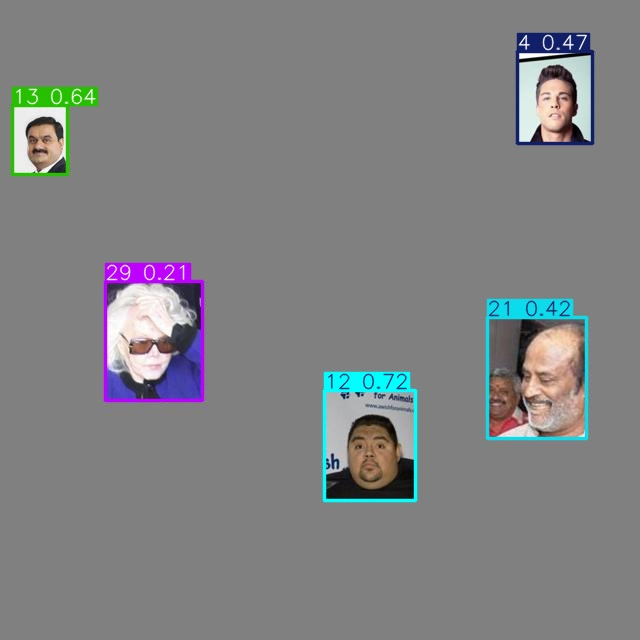

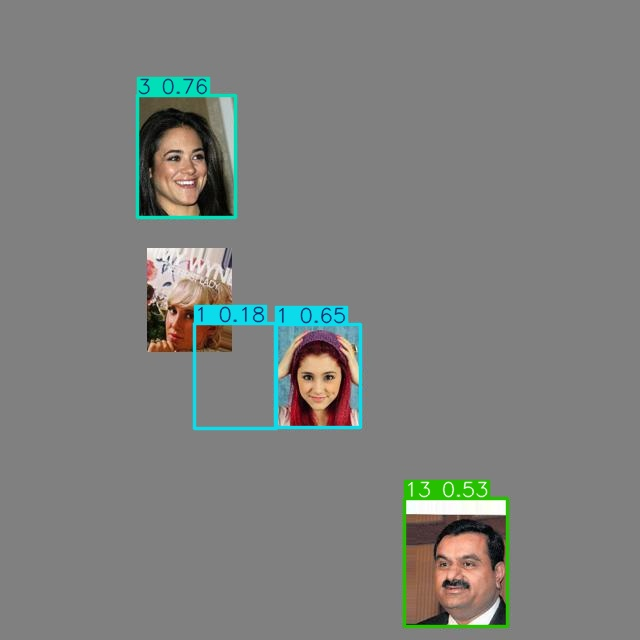

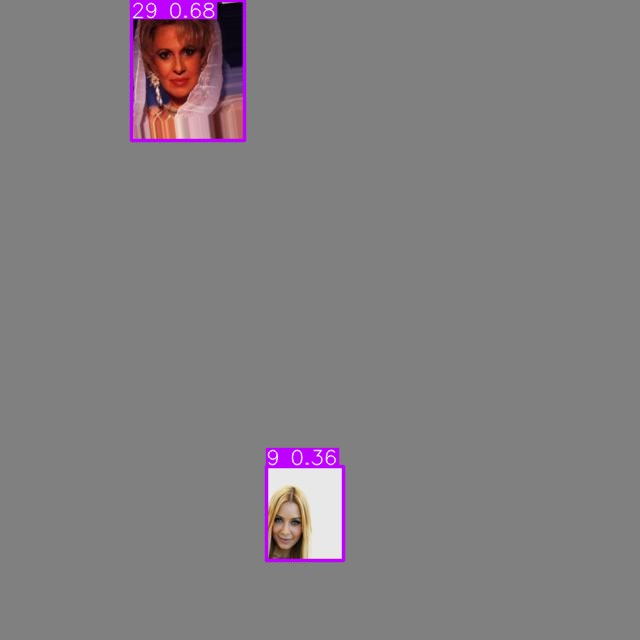


✓ Model saved to Google Drive: celeb_detector_best.pt


In [ ]:
# YOLOV8 CELEBRITY DETECTION WITH GPU — edited for Milestone 3 for SMALL FACES
#  UNZIP data
ZIP_PATH = '/content/drive/MyDrive/yolo_celeba_dataset_enhanced.zip'
EXTRACT_TO = '/content/dataset'

print("Extracting dataset...")
os.makedirs(EXTRACT_TO, exist_ok=True)
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_TO)
print("Dataset extracted")

print("\nFinding data.yaml...")
yaml_path = None
for root, dirs, files in os.walk(EXTRACT_TO):
    if 'data.yaml' in files:
        yaml_path = os.path.join(root, 'data.yaml')
        print(f"Found: {yaml_path}")
        break
if not yaml_path:
    raise FileNotFoundError("data.yaml not found!")

# Update yaml 'path' to absolute
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)
data['path'] = os.path.dirname(yaml_path)
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)
print(f"Updated data.yaml path: {data['path']}")

# Verify dataset structure
train_ct = len(os.listdir(os.path.join(data['path'], 'images/train')))
val_ct   = len(os.listdir(os.path.join(data['path'], 'images/val')))
print(f"\nDataset structure:\n  Train images: {train_ct}\n  Val images:   {val_ct}")

# TRAIN 

# Trying YOLOv8m instead of n - research showed it may be better suited for this
model_name = 'yolov8m.pt'
try:
    model = YOLO(model_name)
except Exception as e:
    print(f"Could not load {model_name}. Falling back to yolov8n.pt. ({e})")
    model = YOLO('yolov8n.pt')

print("\n" + "="*70)
print("TRAINING WITH GPU — tuned for small/low-res faces")
print("="*70)

results = model.train(
    data=yaml_path,
    epochs=20,              # lowered to maintain time efficiency
    imgsz=768,             # imcreased image size helps tiny faces
    batch=-1,
    device=0,
    project='celeb_runs',
    name='celeb_detector_v2',
    patience=6,
    save=True,
    plots=True,
    verbose=True,
    amp=True,
    cache=False,
    workers=4,
    # --- small object friendly augs ---
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.2,
    scale=0.5,
    degrees=0.0,
    shear=0.0,
    translate=0.05,
    perspective=0.0,
    fliplr=0.5,
    flipud=0.0,
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    cos_lr=True,
    close_mosaic=10
)

print("\n Training complete!")
print("="*70)

# LOAD CLASS MAP 
mapping_path = os.path.join(data['path'], 'class_mapping.csv')
class_mapping = pd.read_csv(mapping_path)
reverse_map = dict(zip(class_mapping['class_id'], class_mapping['celebrity_id']))
print(f"Loaded {len(class_mapping)} celebrity mappings")

# TESTING 
trained_path = 'celeb_runs/celeb_detector_v2/weights/best.pt'
trained_model = YOLO(trained_path)

# Validate once to get mAP50 and mAP95 metrics
print("\nRunning val metrics at imgsz=1024…")
metrics = trained_model.val(imgsz=1024)
print(f"mAP50: {metrics.box.map50:.3f} ({metrics.box.map50*100:.1f}%)")
print(f"mAP50-95: {metrics.box.map:.3f} ({metrics.box.map*100:.1f}%)")

# Sample predictions on a few VAL images
val_img_dir = os.path.join(data['path'], 'images/val')
sample_imgs = [os.path.join(val_img_dir, f) for f in os.listdir(val_img_dir)[:3]]

print("\nTesting on sample images (imgsz=1024, conf=0.15, agnostic_nms=True):")
for img_path in sample_imgs:
    results = trained_model.predict(
        source=img_path, imgsz=768,
        conf=0.15, iou=0.50,
        agnostic_nms=True, max_det=500, device=0, save=True, project='/content', name='preds', exist_ok=True
    )
    # print classes
    for r in results:
        print(f"\n{os.path.basename(img_path)}: {len(r.boxes)} detections")
        for b in r.boxes:
            cid = int(b.cls[0].item())
            conf = b.conf[0].item()
            celeb_id = reverse_map.get(cid, cid)
            print(f"  - Celebrity ID {celeb_id}: {conf:.2%}")

# Display results
from IPython.display import Image, display
for img_path in sample_imgs:
    out = f"/content/preds/{os.path.basename(img_path)}"
    if os.path.exists(out):
        display(Image(out))

# Save model to Google Drive
import shutil
drive_path = '/content/drive/MyDrive/celeb_detector_best.pt'
shutil.copy(trained_path, drive_path)
print(f"\n✓ Model saved to Google Drive: celeb_detector_best.pt")


In [19]:
# @title
from pathlib import Path
import shutil

RUN_DIR_SRC = Path("celeb_runs/celeb_detector")  # folder containing weights, results.png, etc.
RUN_DIR_DST = Path("/content/drive/MyDrive/celebrity_project_outputs/runs/celeb_detector")

if RUN_DIR_SRC.exists():
    for p in RUN_DIR_SRC.rglob("*"):
        if p.is_file():
            rel = p.relative_to(RUN_DIR_SRC)
            (RUN_DIR_DST / rel).parent.mkdir(parents=True, exist_ok=True)
            shutil.copy2(p, RUN_DIR_DST / rel)
    print("✓ Copied training artifacts to:", RUN_DIR_DST)
else:
    print("⚠ Run directory not found:", RUN_DIR_SRC)


✓ Copied training artifacts to: /content/drive/MyDrive/celebrity_project_outputs/runs/celeb_detector


**Demo UI - testing**

In [ ]:
#!pip install ultralytics gradio -qq
# paths
MODEL_PATH = Path("/content/drive/MyDrive/celeb_detector_best.pt")
CLASS_MAP_CSV = Path("/content/drive/MyDrive/class_mapping.csv")
SEARCH_DIRS = [
    Path("./yolo_celeba_dataset/images/val"),
    Path("./yolo_celeba_dataset/images/train"),
    Path("./multi_celebrity_examples/collages"),
    Path("."),
]

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# load model
model = YOLO(str(MODEL_PATH))

# mapping
rev_map = None
if CLASS_MAP_CSV.exists():
    dfm = pd.read_csv(CLASS_MAP_CSV)
    rev_map = dict(zip(dfm["class_id"], dfm["celebrity_id"]))

def resolve_path(s: str) -> Optional[Path]:
    p = Path(s)
    if p.exists():
        return p
    for d in SEARCH_DIRS:
        cand = d / s
        if cand.exists():
            return cand
    name_lower = Path(s).name.lower()
    for d in SEARCH_DIRS:
        if not d.exists():
            continue
        for f in d.iterdir():
            try:
                if f.is_file() and f.name.lower() == name_lower:
                    return f
            except Exception:
                pass
    return None

def _iou_xyxy(a, b) -> float:
    ax1, ay1, ax2, ay2 = a
    bx1, by1, bx2, by2 = b
    inter_x1, inter_y1 = max(ax1, bx1), max(ay1, by1)
    inter_x2, inter_y2 = min(ax2, bx2), min(ay2, by2)
    iw, ih = max(0, inter_x2 - inter_x1), max(0, inter_y2 - inter_y1)
    inter = iw * ih
    if inter <= 0:
        return 0.0
    area_a = (ax2 - ax1) * (ay2 - ay1)
    area_b = (bx2 - bx1) * (by2 - by1)
    return inter / (area_a + area_b - inter + 1e-9)

def dedup_across_classes(dets: List[Dict], iou_thresh=0.5) -> List[Dict]:
    dets = sorted(dets, key=lambda d: d["conf"], reverse=True)
    kept = []
    for d in dets:
        if all(_iou_xyxy(d["xyxy"], k["xyxy"]) < iou_thresh for k in kept):
            kept.append(d)
    return kept

def predict(image_path, conf, iou, imgsz, tta, device):
    p = resolve_path(image_path)
    if not p:
        return None, "Image not found!", None

    # Run prediction
    res = model.predict(
        source=str(p),
        conf=conf,
        iou=iou,
        imgsz=imgsz,
        augment=tta,
        agnostic_nms=True,
        device=device,
        save=True,
        verbose=False
    )

    if not res:
        return str(p), "No detections", None

    r = res[0]

    # Collect detections
    raw = []
    for b in r.boxes:
        cls_id = int(b.cls[0].item())
        confv = float(b.conf[0].item())
        xyxy = [int(v) for v in b.xyxy[0].tolist()]
        raw.append({"cls": cls_id, "conf": confv, "xyxy": xyxy})

    dedup = dedup_across_classes(raw, iou_thresh=0.50)

    # Format results
    results_text = f"Detections (raw): {len(raw)}\n"
    results_text += f"Detections (after dedup): {len(dedup)}\n\n"

    for i, d in enumerate(dedup, 1):
        if rev_map is not None:
            celeb_id = rev_map.get(d["cls"], f"Unknown-{d['cls']}")
            results_text += f"{i}. Celebrity ID: {celeb_id} | Class: {d['cls']} | Confidence: {d['conf']:.2%}\n"
        else:
            results_text += f"{i}. Class: {d['cls']} | Confidence: {d['conf']:.2%}\n"

    # Get visualization
    vis_path = None
    if hasattr(r, 'save_dir') and r.save_dir:
        vis_path = Path(r.save_dir) / p.name
    else:
        runs_dir = Path("runs/detect")
        if runs_dir.exists():
            pred_folders = sorted([f for f in runs_dir.iterdir() if f.is_dir() and f.name.startswith('predict')],
                                key=os.path.getmtime, reverse=True)
            if pred_folders:
                vis_path = pred_folders[0] / p.name

    return str(p), results_text, str(vis_path) if vis_path and vis_path.exists() else None

# Create Gradio interface
with gr.Blocks(theme=gr.themes.Base(), css="""
    .gradio-container {background: linear-gradient(135deg, #800020 0%, #a0002a 100%) !important;}
    .gr-button-primary {background: #800020 !important; border: none !important;}
    h1 {color: white !important; text-align: center !important; padding: 20px !important;}
""", title="IE7615 Project 1, Group 3") as demo:

    gr.Markdown("# IE7615 Project 1, Group 3", elem_classes="header")

    with gr.Row():
        with gr.Column():
            image_input = gr.Textbox(label="Image Path", placeholder="full path (google drive only)")
            with gr.Row():
                conf_slider = gr.Slider(0.05, 0.50, value=0.15, step=0.01, label="Confidence")
                iou_slider = gr.Slider(0.30, 0.70, value=0.40, step=0.01, label="IoU")
            with gr.Row():
                imgsz_dropdown = gr.Dropdown([416, 512, 640, 736, 832], value=640, label="Image Size")
                tta_checkbox = gr.Checkbox(value=True, label="TTA")
                device_dropdown = gr.Dropdown([0, "cpu"], value=0, label="Device")
            run_btn = gr.Button("Run", variant="primary")

    with gr.Row():
        with gr.Column():
            original_path = gr.Textbox(label="Image Path")
            results_output = gr.Textbox(label="Detection Results", lines=10)
        with gr.Column():
            prediction_image = gr.Image(label="Prediction with Bounding Boxes", type="filepath")

    run_btn.click(
        predict,
        inputs=[image_input, conf_slider, iou_slider, imgsz_dropdown, tta_checkbox, device_dropdown],
        outputs=[original_path, results_output, prediction_image]
    )

# Launches in new tab
demo.launch(share=True, inbrowser=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4b511efc3f61e8b639.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
